# Answers

You can edit this Jupyter notebook to include your answers and run any code that generates those answers or produces plots.  You can add additional cells for code or markdown as needed.

This homework is primarily about running simulations involving initial value problems (IVPs)

## Problem 0 (45 points)

In this problem, you'll implement a custom ODE solver for `solve_ivp` based on the Forward Euler method, and implement some basic tests.

### Part A (20 points)
If you read the [documentation for `solve_ipv`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html), which we used in class, you'll see that you can write your own solver.

Write a solver for the forward Euler method, which is not implemented as one of the available solvers (while simple, it typically is not very accurate).  Recall, this is the basic rule:
\begin{equation}
y(t + h) = y(t) + h f(t, y)
\end{equation}

Your solver should be a class which is derived from [`scipy.integrate.OdeSolver`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.OdeSolver.html#scipy.integrate.OdeSolver)
```python
class ForwardEuler(scipy.integrate.OdeSolver):
    pass
```

Your class definition should go in [`euler.py`](euler.py)

You should read the documentation for this base class in order to implement `ForwardEuler`.  Here are some hints/notes:
* Allow a user to set `h` using a keyword argument.  This can be passed using `solve_ivp(..., method=ForwardEuler, h=0.01)` to set `h=0.01`
* Use a default step size `h = (t_bound - t0) / 100`
* private methods begin with an underscore "_"
* the method `_dense_output_impl(self)` should output a `ForwardEulerOutput` (defined in [`euler.py`](euler.py))
* direction should be `+1`
* You won't use a Jacobian, so `njev` and `nlu` can remain at 0.
* You may want to consider using `super(ForwardEuler, self).__init__`
* You may want to read the source code for the parent class [here](https://github.com/scipy/scipy/blob/v1.5.3/scipy/integrate/_ivp/base.py#L25-L214)

---

*put any discussion here*

In [1]:
from scipy.integrate import solve_ivp
from euler import ForwardEuler

### Part B (10 points)

Use your `ForwardEuler` solver and `solve_ivp` to solve an IVP $y'(t) = y$ with $y(0) = 1$ on the domain $t\in [0,5]$, using a step size `h=0.01`.  Make a plot of the solution to this IVP with axes labeled `y` and `x`.

Use SymPy to obtain the ground-truth solution to this IVP.  What is the largest error you see on the domain you solved the problem?  Try solving with the default solver in `solve_ivp`.  What is the largest error in this case?

---

**My Answer**

The largest error using ForwardEuler Method is 3.6842359921385537.

The largest error using the default method is 0.05870895676686416.

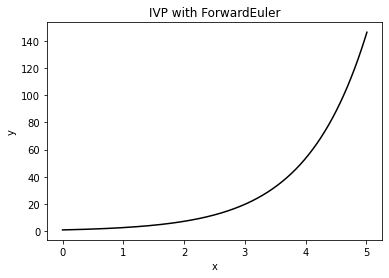

The largest error using ForwardEuler Method is 3.6842359921385537.
The largest error using the default method is 0.05870895676686416.


In [16]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from sympy.solvers import ode

y0 = np.array([1])
f = lambda t, y : y
t_span = (0, 5)

# use the ForwardEuler solver
sol_fe = solve_ivp(f, t_span, y0, method=ForwardEuler, h=0.01)
plt.plot(sol_fe.t, sol_fe.y[0], c='k')
plt.title("IVP with ForwardEuler")
plt.ylabel("y")
plt.xlabel("x")
plt.show()

# use SymPy to obtain the ground-truth solution to this IVP
t = sym.symbols('t') 
y = sym.Function('y') 
eqn = y(t).diff(t) - y(t)
sol_sympy = ode.dsolve(eqn, hint='separable', ics={y(0): 1})

# largest error using ForwardEuler Solver
g = sym.lambdify(t, sol_sympy.rhs, 'numpy')
error_fe = np.max(np.abs(sol_fe.y[0]-g(sol_fe.t)))

# largest error using Default Solver
t_eval = np.linspace(0,5,502)
sol_d = solve_ivp(f, t_span, y0, t_eval = t_eval)
error_d = np.max(np.abs(sol_d.y[0]-g(sol_d.t)))

print(f"The largest error using ForwardEuler Method is {error_fe}.")
print(f"The largest error using the default method is {error_d}.")

### Part C (15 points)

Implement unit tests that verify that ODE solutions (numerically) obey the ODE.  Try this for $y'(t) = y$, with $y(0) = 1$ on the domain $t\in [0,5]$.  use a finite difference stencil with step size `k` (`k` should be smaller than the `h` you used to solve the ODE) to compute the derivative at several points.  You should only expect the derivative to be accurate to about `h*y`

Implement tests for `solve_ivp` using the default settings as well as using your `ForwardEuler` implementation.

Put these tests in [`test.py`](test.py).  Set up your unit tests to run when you push changes to GitHub using GitHub actions. In order to respect server time, set a 10 minute time-limit on your github actions workflow. To see an example of how to set a time-limit, see line 9 in the relevant file from Homework 3 by clicking [here](https://github.com/caam37830-2021/homework-3-template/blob/main/.github/workflows/push.yml).

---

*put any discussion here*

## Problem 1 (20 points)

In this problem, you'll solve two simple, but related, ODEs using `solve_ivp`.

### Part A (13 points)

On the surface of the earth, objects are accelerated by a more-or-less constant gravitational field.  We'll consider an object thrown vertically with initial position $y=y_0$, and initial velocity $y' = v_0$.

We'll consider a simplified problem with no wind resistance.  Newton's laws of motion tell us $y''(t) = -g$, where $g = 9.8 m/s^2$.  This is a second order ODE, which we can turn into a system of first order ODEs using the substituion $p = y'$.  Then we have
\begin{equation}
\begin{cases}
y'(t) = p(t)\\
p'(t) = -g
\end{cases}
\end{equation}

You can encode this using a vector $v$, where $v[0]$ is the value $y$ above, and $v[1]$ is $p$.

Use `solve_ivp` to solve for `y(t)` using `y0 = 0` and `y'(0) = 10` (i.e. you throw a ball straight up in the air at a speed of $10 m/s$).  Run this simulation for $4$ seconds.  make a plot of the trajectory $y$ as a function of $t$ (i.e. $t$ is on the horizontal axis and $y$ is on the vertical axis).  Set up an event to end the simulation when `y` is zero again (when the ball hits the ground).  At what time does the ball hit the ground?

Set up an event to find when the ball is at its highest point (`p(t) = 0`).  This should not terminate the simulation.

---
**My Answer**

After 2.041 seconds, the ball will hit the ground.

After 1.020 seconds, the ball will be at its highest point.

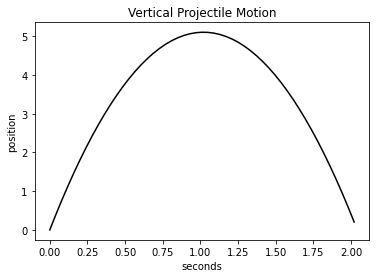

After [2.04081633] seconds, the ball will hit the ground.
After [1.02040816] seconds, the ball will be at its highest point.


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

y0 = 0
p0 = 10
g = 9.8

v0 = np.array([y0, p0])
f = lambda t, v : np.array([v[1], -g] ) # v[0] is position y; v[1] is velocity p

t_span = (0, 4) # simulation for 4 seconds
t_eval = np.linspace(0, 4, 100)

def hit_ground(t, v):
    '''
    When y is 0 again, the ball hits the ground.
    '''
    return v[0]

def highest_point(t, v):
    '''
    When p is 0, the ball is at its hightest point.
    '''
    return v[1]

hit_ground.terminal=True 
hit_ground.direction=-1
highest_point.terminal=False

sol = solve_ivp(f, t_span, v0, t_eval=t_eval, events=(hit_ground, highest_point)) 

plt.plot(sol.t, sol.y[0], c='k')
plt.title("Vertical Projectile Motion")
plt.ylabel("position")
plt.xlabel("seconds")
plt.show()

print(f"After {sol.t_events[0]} seconds, the ball will hit the ground.")
print(f"After {sol.t_events[1]} seconds, the ball will be at its highest point.")

### Part B (7 points)

We'll now take into account wind resistance on the ball.  We'll make a bunch of assumptions, and simply assume that the drag can be expressed as a force that accelerates the ball by adding a term `y''(t) = p'(t) = -9.8 -0.02 sgn(p(t)) p(t)**2`, where `sgn(p(t))` can be computed using `np.sign` (the sign of the velocity).

Incorporate this term into the system of ODEs, and use `solve_ivp` to plot the trajectory of the ball with the same initial conditions as in part A.  Set up an event to terminate the simulation when the ball hits the ground.  At what time does the ball hit the ground?  Is this before or after the ball hits the ground when there is no wind resistance?

Set up an event to find when the ball is at its highest point (`p(t) = 0`).  This should not terminate the simulation.

---

**My Answer**

After 1.947 seconds, the ball will hit the ground, which is before the ball hits the ground when there is no wind resistance.

After 0.959 seconds, the ball will be at its highest point.

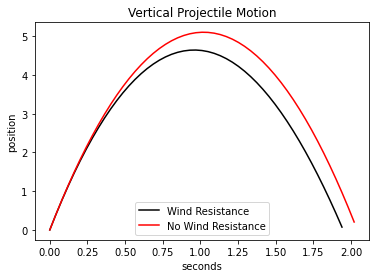

After [1.947363] seconds, the ball will hit the ground.
This is before the ball hits the ground when there is no wind resistance.
After [0.95873405] seconds, the ball will be at its highest point.


In [7]:
f1 = lambda t, v : np.array([v[1], 
                            -g-0.02 * np.sign(v[1]) *v[1]**2] ) # v[0] is position y; v[1] is velocity p

sol1 = solve_ivp(f1, t_span, v0, t_eval=t_eval, events=(hit_ground, highest_point)) 

plt.plot(sol1.t, sol1.y[0], label="Wind Resistance", c='k')
plt.plot(sol.t, sol.y[0], label="No Wind Resistance", c='r')
plt.title("Vertical Projectile Motion")
plt.ylabel("position")
plt.xlabel("seconds")
plt.legend()
plt.show()

print(f"After {sol1.t_events[0]} seconds, the ball will hit the ground.")
print("This is before the ball hits the ground when there is no wind resistance.")
print(f"After {sol1.t_events[1]} seconds, the ball will be at its highest point.")

## Problem 2 (25 points)

Now that you're warmed up, here are some more simulations.

### Part A (15 points)

In this problem, we'll simulate a planet and moon moving in a 2-dimensional plane.

Newton's law of gravity says that $F_g = Gm_1 m_2 / \|r\|^2$.  The direction of the force is in the direction of the vector $r$.  Let $x(t)$ dentote the position of the planet and $y(t)$ denote the position of the moon, and $r(t) = x(t) - y(t)$ Then
\begin{equation}
x''(t) = -F_g / m_1 \times r / \|r\|\\
y''(t) = F_g / m_2 \times r / \|r\|
\end{equation}
$x$ and $y$ are 2-vectors, so this is a system of 4-second order ODEs.  We can use the trick from problem 1 to write this as 8 first order ODEs by introducing the vector-valued variables
$p(t) = x'(t)$, and $q(t) = y'(t)$.  Here are the terms for $x$:
\begin{equation}
p_1'(t) = -F_g / m_1 \times r_1(t) / \|r\|\\
p_2'(t) = -F_g / m_1 \times r_2(t) / \|r\|\\
x_1'(t) = p_1(t)\\
x_2'(t) = p_2(t)
\end{equation}

We'll model the Earth and moon.  The [Gravitational constant](https://en.wikipedia.org/wiki/Gravitational_constant) has value `G=6.67 e-11` (we're dropping units, which are all SI).  The mass of the earth is `m1 = 5.972 e24`, and the mass of the moon is `m2=0.07346 e24`.  The distance from the moon to the earth is `r = 384.4 e6`.  This means the orbital speed of the moon around the earth is about `1.022 e3`.

Use `solve_ivp` to run a simulation of the moon orbiting the earth for `5 e6` seconds (about 2 months).  Use initial conditions $x(0) = 0, p(0) = 0$ for the earth, and $y(0) = (0, 384.4 \times 10^6)$ and $q(0) = (1.022 \times 10^3, 0)$

Plot $x_1(t), x_2(t)$ and $y_1(t), y_2(t)$ in the same plane with different colors (include a legend and title).

---

**My Discussion**

This figure looks a little wired because there is no initial velocity for planet, 
and the initial distance is just the average distance between the moon and the planet.

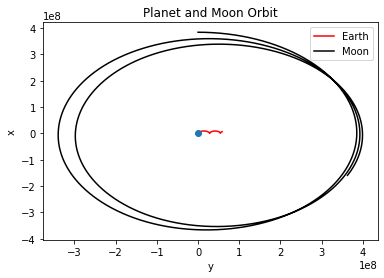

In [19]:
x10 = 0
x20 = 0
p10 = 0
p20 = 0
y10 = 0
y20 = 384.4e6
q10 = 1.022e3
q20 = 0

m1 = 5.972e24
m2 = 0.07346e24
G=6.67e-11

v0 = np.array([x10, x20, p10, p20, y10, y20, q10, q20])
f = lambda t, v : np.array([
    v[2],
    v[3],
    - G * m2 * (v[0]-v[4]) /((v[0]-v[4])**2 + (v[1]-v[5])**2)**(3/2),
    - G * m2 * (v[1]-v[5]) /((v[0]-v[4])**2 + (v[1]-v[5])**2)**(3/2),
    v[6],
    v[7],
    - G * m1 * (v[4]-v[0]) /((v[0]-v[4])**2 + (v[1]-v[5])**2)**(3/2),
    - G * m1 * (v[5]-v[1]) /((v[0]-v[4])**2 + (v[1]-v[5])**2)**(3/2)
] )

t_span = (0, 5e6)
t_eval = np.linspace(0,5e6,100000)
sol = solve_ivp(f, t_span, v0, t_eval=t_eval) 

plt.plot(sol.y[0], sol.y[1], label = "Earth", c = "r")
plt.plot(sol.y[4], sol.y[5], label = "Moon", c = "k")
plt.plot([0], [0], 'o')
plt.ylabel("x")
plt.xlabel("y")
plt.title("Planet and Moon Orbit")
plt.legend()
plt.show()


### Part B (10 points)

The [Lorentz system](https://en.wikipedia.org/wiki/Lorenz_system) is a simplified model of atmospheric convection, which is one of the earliest systems investigated which exhibit [chaotic behavior](https://en.wikipedia.org/wiki/Chaos_theory).

\begin{equation}
\begin{cases}
dx/dt = \sigma( y - x)\\
dy/dt = x( \rho - z) - y\\
dz/dt = xy - \beta z
\end{cases}
\end{equation}

$x$ is the rate of convection, and $y$ and $z$ measure horizontal and vertical temperature variation.

You can use the parameters Lorentz used: $\sigma=10, \beta = 8/3, \rho = 28$.  
Run one simulation starting $x = y = z = 10$.  Run the simulation for $t\in [0,7]$.

Run another simulation starting at $y = z = 10$, and $x = 10.1$.  Run the simulation for $t \in [0,7]$.

Plot both solution trajectories in the $x,y$ plane (i.e. `plt(sol.y[0], sol.y[1],...`) using different colors (include labels, a title, and legend).  This system is chaotic, so the trajectories should start close and then get further apart.

---

*put any answers/discussion here*

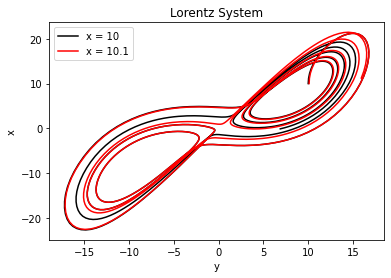

In [20]:
sigma = 10
beta = 8/3
rho = 28

v01 = np.array([10, 10, 10])
v02 = np.array([10.1, 10, 10])

f = lambda t, v : np.array([
    sigma*(v[1]-v[0]),
    v[0]*(rho-v[2])-v[1],
    v[0]*v[1]-beta*v[2]
 ] )

t_span = (0,7)
t_eval = np.linspace(0,7,1000)
sol1 = solve_ivp(f, t_span, v01, t_eval=t_eval) 
sol2 = solve_ivp(f, t_span, v02, t_eval=t_eval) 

plt.plot(sol1.y[0], sol1.y[1], label = "x = 10", c = 'k')
plt.plot(sol2.y[0], sol2.y[1], label = "x = 10.1", c = 'r')
plt.ylabel("x")
plt.xlabel("y")
plt.title("Lorentz System")
plt.legend()
plt.show()

## Problem 3 (10 points)

Use functionality from `scipy.sparse` to help illustrate your answers to the following questions.

In the [class materials on differentiation](https://caam37830.github.io/book/04_functions/differentiation.html), we defined `forward_diff_matrix` and `backward_diff_matrix`.  What vectors characterize the nullspace of each of these matrices (i.e. vectors `x` so that `D @ x = 0`)?

Give an interpretation (from calculus) of the vector `y` where `y` solves the linear system `D @ y = x`, where `D` is a finite-difference matrix.  What is the implication of the nullspace of `D` on solving this linear system?

Create a finite difference operator for the Laplacian $\Delta = \partial_x^2 + \partial_y^2$ where second-order differences are based on the stencil `[1, -2, 1]`.  What is the nullspace of this matrix?

---

**My Answer Here**

1. For both `forward_diff_matrix` and `backward_diff_matrix`, `np.ones(n)` characterizes the nullspace. (As below)

2. i) The vector `y` can be interpreted as the function whose derivative for points on the grid is `x`. i.e. `y` is the numerical integration of `x`. In other words, `y` can be interpretted as the solution of this ordinary differential equation. ii) The implication of the nullspace of `D` on solving this linear system is like the general solution of the ordinary differential equation, i.e. it's the *C* in the indefinite integration.

3. The nullspace of this matrix is the `np.ones(n*n)`

In [132]:
## import scipy.sparse as sparse
import scipy.sparse.linalg as sla

# create matrix A to apply forward difference scheme
def forward_diff_matrix(n):
    data = []
    i = []
    j = []
    for k in range(n - 1):
        i.append(k)
        j.append(k)
        data.append(-1)

        i.append(k)
        j.append(k+1)
        data.append(1)
        
    # we'll just set the last entry to 0 to have a square matrix
    return sparse.coo_matrix((data, (i,j)), shape=(n, n)).tocsr()

def backward_diff_matrix(n):
    data = []
    i = []
    j = []
    for k in range(1,n):
        i.append(k)
        j.append(k)
        data.append(1)

        i.append(k)
        j.append(k-1)
        data.append(-1)
        
    # we'll just set the last entry to 0 to have a square matrix
    return sparse.coo_matrix((data, (i,j)), shape=(n, n)).tocsr()

n = 3

F = forward_diff_matrix(n).astype(float)
f,v1 = sla.eigs(F, k = 1, which = 'SM')
print(f"The nullspace of forward_diff_matrix(n) is characterized by {v1}")

B = backward_diff_matrix(n).astype(float)
f,v2 = sla.eigs(B, k = 1, which = 'SM')
print(f"The nullspace of backward_diff_matrix(n) is characterized by {v2}")

# finite difference operator for the Laplacian

D2  = forward_diff_matrix(n) @ backward_diff_matrix(n)
D2x = sparse.kron(sparse.eye(n), D2).tocsr()
D2y = sparse.kron(D2, sparse.eye(n)).tocsr()

L = D2x + D2y

L.astype(float)
f,vL = sla.eigs(L, k = 1, which = 'SM')
print(f"The nullspace of the Laplacian is characterized by {vL}")

The nullspace of forward_diff_matrix(n) is characterized by [[0.57735027+0.j]
 [0.57735027+0.j]
 [0.57735027+0.j]]
The nullspace of backward_diff_matrix(n) is characterized by [[-0.57735027+0.j]
 [-0.57735027+0.j]
 [-0.57735027+0.j]]
The nullspace of the Laplacian is characterized by [[-0.33333333+0.j]
 [-0.33333333+0.j]
 [-0.33333333+0.j]
 [-0.33333333+0.j]
 [-0.33333333+0.j]
 [-0.33333333+0.j]
 [-0.33333333+0.j]
 [-0.33333333+0.j]
 [-0.33333333+0.j]]


## Feedback

If you would like share how long it took you to complete this assignment, it will help adjust the difficulty for future assignments.  You're welcome to share additional feedback as well.